In [6]:
import numpy as np

In [7]:
import pandas as pd
%matplotlib inline


In [8]:
# d

#Read in both parts of the Titanic dataset
my_df_1 = pd.read_csv("https://raw.githubusercontent.com/Taowyoo/LearningML/master/Module%201/Titanic.csv")
my_df_2 = pd.read_csv("https://raw.githubusercontent.com/Taowyoo/LearningML/master/Module%201/Titanic_II.csv")

print(my_df_1.shape)
print(my_df_2.shape)

(891, 12)
(418, 12)


In [9]:
my_df_2.shape

(418, 12)

In [10]:
# Get column names of your dataframe

print(my_df_1.columns)
print(my_df_2.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [11]:
# Merge the two dataframes into the same dataframe using append

merged_df = my_df_1.append(my_df_2)
merged_df.shape

(1309, 12)

In [12]:
#Merge the two dataframes into the same dataframe using concat

df_list = [my_df_1,my_df_2]
merged_df_2 = pd.concat(df_list, axis = 0)
merged_df_2.shape

(1309, 12)

In [15]:
# Write out the merged dataframe as a .csv file

merged_df.to_csv("./merged_data.csv",index = False)


In [16]:
# How can we define our own function and make new columns with derived data

def child_age(x):
    if x < 12:
        return "Child"
    elif x>12:
        return "Adult"
    else:
        return "unknown"

merged_df["Status"] = merged_df["Age"].apply(child_age)

merged_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


In [17]:
merged_df[["Age","Status"]].head(n =7)

,Age,Status
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,unknown
6,54.0,Adult


In [18]:
# How to make summary statistics of a column
merged_df["Fare"].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [19]:
# Make a dataframe by joining lists of data

Names = ["Jason","Laura","Johnson","Meuller","Anna"]

City = ["Seattle","San Francisco", "Portland", "Santa Cruz", "Athens"]

State = ["Washington", "California", "Oregon", "California", "Georgia"]

Income = [70000,80000,105000,45000,90000]

our_df = pd.DataFrame({"Name": Names, "City": City, 
                       "State": State, "Annual Income": Income})

our_df.head()

,Name,City,State,Annual Income
0,Jason,Seattle,Washington,70000
1,Laura,San Francisco,California,80000
2,Johnson,Portland,Oregon,105000
3,Meuller,Santa Cruz,California,45000
4,Anna,Athens,Georgia,90000


In [20]:
# Find and replace in our dataframe

rep_df = our_df.replace(to_replace = "California",
                        value = "CA",inplace = False)

rep_df.head()


,Name,City,State,Annual Income
0,Jason,Seattle,Washington,70000
1,Laura,San Francisco,CA,80000
2,Johnson,Portland,Oregon,105000
3,Meuller,Santa Cruz,CA,45000
4,Anna,Athens,Georgia,90000


In [21]:
our_df.head()

,Name,City,State,Annual Income
0,Jason,Seattle,Washington,70000
1,Laura,San Francisco,California,80000
2,Johnson,Portland,Oregon,105000
3,Meuller,Santa Cruz,California,45000
4,Anna,Athens,Georgia,90000


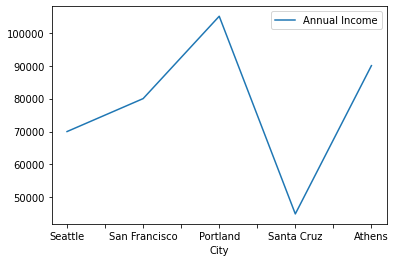

In [22]:
rep_df.plot(x = "City", y = "Annual Income", kind = "line")

# Drill Time !

Write a function that takes as input the fare, and if it's below 10, outputs "inexpensive", and if it's above 10 returns "expensive". Use this function to add a new column "Fare status" to your dataframe

In [23]:
def fare_value(x):
    if x < 10:
        return "inexpensive"
    else:
        return "expensive"

merged_df["Fare status"] = merged_df["Fare"].apply(fare_value)

merged_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Fare status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,inexpensive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,expensive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,inexpensive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,expensive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,inexpensive


Get all column names of your new dataframe

In [34]:
print(merged_df.columns[-2:].values)

['Status' 'Fare status']


Write this dataframe to disk as a csv file

In [36]:
merged_df.to_csv('merged_data_new_1.csv')

Calculate summary statistics for the age column of your dataframe. What is the mean age ?

In [49]:
merged_df['Age'].describe()['mean']

29.881137667304014

What is the average age of passengers who travelled first class ?

In [62]:
print(merged_df[merged_df.Pclass == 1].Age.mean())

39.15992957746479


What is the average fare paid by passengers who travelled first class ?

In [63]:
print(merged_df[merged_df.Pclass == 1].Fare.mean())

87.5089916408668


Replace male by M and female by F in the dataframe

In [66]:
rep_merged_df = merged_df.replace(to_replace = ["male","female"],
                        value = ["M", "F"],inplace = False)
rep_merged_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status,Fare status
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,inexpensive
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,Adult,expensive
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,inexpensive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,Adult,expensive
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,Adult,inexpensive


Scatter plot fares against passenger Age

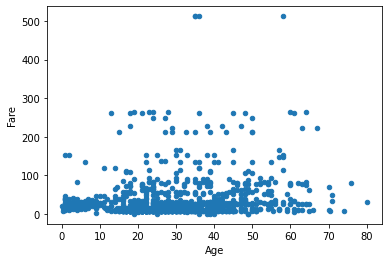

In [81]:
merged_df.plot(x = 'Age', y = 'Fare', kind = 'scatter')